# Assignment: Running a Classification Tree

## Assignment 1 of Machine Learning for Data Analysis

I was talking to someone who made the claim that children that come from a home where the parents split before they were 18 where more likely to get into trouble with the law because they would have had less support or guiding influence growing up. I have chosen a few different predictors to see what would be the likely cause of the target variable, "drug use", which would be a good indicator of deviant behaviour and potential trouble with the law.
Among the predictors are, parents splitting before 18, the age this occured and which parent remained to raise the child to see if any of these factors could predict the target variable.

In [57]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

The data set used in this Decision Tree example is the "U.S. National Epidemiological Survey on Alcohol and Related Conditions" survey data. From this dataset a subset of the following columns is selected. 
'S1Q1D5','S1Q2D','S1Q2E','S1Q2F','S1Q6A','S1Q9A','S1Q9B','S1Q9C','DGSTATUS'. This subset of data was then exported and stored on a public dropbox folder and can be read in using the below command.

In [58]:
nesarc_data = pd.read_csv("https://dl.dropboxusercontent.com/u/84673878/nesarc_output_cut.csv")

Give the columns meaningful names.

In [59]:
cols = ["WHITE","PARENTS_SPLIT","SPLIT_AGE","WHICH_PARENT_REMAINED","HIGHEST_GRADE","JOB_INDUSTRY","JOB_TYPE","EMPLOYER_TYPE","DGSTATUS"]
nesarc_data.columns = cols

We then add NaNs where we have missing values. This is because the Python Scikit Decision Tree library can not handle missing values at the present time.

In [60]:
#Add NaN's for missing values
row_index = nesarc_data.SPLIT_AGE == " "
nesarc_data.loc[row_index, 'SPLIT_AGE'] = np.NaN
row_index = nesarc_data.WHICH_PARENT_REMAINED == " "
nesarc_data.loc[row_index, 'WHICH_PARENT_REMAINED'] = np.NaN
row_index = nesarc_data.JOB_INDUSTRY == " "
nesarc_data.loc[row_index, 'JOB_INDUSTRY'] = np.NaN
row_index = nesarc_data.JOB_TYPE == " "
nesarc_data.loc[row_index, 'JOB_TYPE'] = np.NaN
row_index = nesarc_data.EMPLOYER_TYPE == " "
nesarc_data.loc[row_index, 'EMPLOYER_TYPE'] = np.NaN

Convert the target to a binary variable, 0 = never used drugs, 1 = current or past drug user

In [61]:
row_index = nesarc_data.DGSTATUS == 3
nesarc_data.loc[row_index, 'DGSTATUS'] = 0
row_index = nesarc_data.DGSTATUS == 2
nesarc_data.loc[row_index, 'DGSTATUS'] = 1

In [62]:
#then convert all the columns to numeric
nesarc_data[cols] = nesarc_data[cols].apply(pd.to_numeric)

Check to see all columns are now a numeric data type.

In [63]:
#Check all columns are numeric data types
nesarc_data.dtypes

WHITE                      int64
PARENTS_SPLIT              int64
SPLIT_AGE                float64
WHICH_PARENT_REMAINED    float64
HIGHEST_GRADE              int64
JOB_INDUSTRY             float64
JOB_TYPE                 float64
EMPLOYER_TYPE            float64
DGSTATUS                   int64
dtype: object

Remove all the NaNs

In [64]:
nesarc_data = nesarc_data.dropna()

Correct for outliers on SPLIT_AGE, substitute 99 for median age

In [65]:
row_index = nesarc_data.SPLIT_AGE == 99
nesarc_data.loc[row_index, 'SPLIT_AGE'] = nesarc_data[nesarc_data.SPLIT_AGE < 99].SPLIT_AGE.median()

Select the predictors from the data.

In [66]:
predictors = nesarc_data[["WHITE","PARENTS_SPLIT","SPLIT_AGE","WHICH_PARENT_REMAINED","HIGHEST_GRADE","JOB_INDUSTRY","JOB_TYPE","EMPLOYER_TYPE"]]

Choose the "Drug Status" column as the target to predict for.

In [67]:
targets = nesarc_data[["DGSTATUS"]]

Do a 60/40 split on the data to create the training and test datasets.

In [68]:
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

After select various parameters, the ones chosen below seem to work best for the creating the Decision Tree.

In [69]:
#Build model on training data
classifier=DecisionTreeClassifier(max_depth = 4, min_samples_split = 10, random_state = 1)
classifier=classifier.fit(pred_train,tar_train)

Run the prediction on the test data and check how well it performs.

In [70]:
predictions=classifier.predict(pred_test)
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1469,   75],
       [ 758,   65]])

In [71]:

sklearn.metrics.accuracy_score(tar_test, predictions)

0.64807773553020698

Feature importance

In [72]:
classifier.feature_importances_

array([ 0.36179157,  0.        ,  0.20220166,  0.        ,  0.23004769,
        0.        ,  0.1616324 ,  0.04432669])

## Dispaly the decision tree output
Note: If the graphic is small try double clicking on it and it should expand it and bring it into focus.

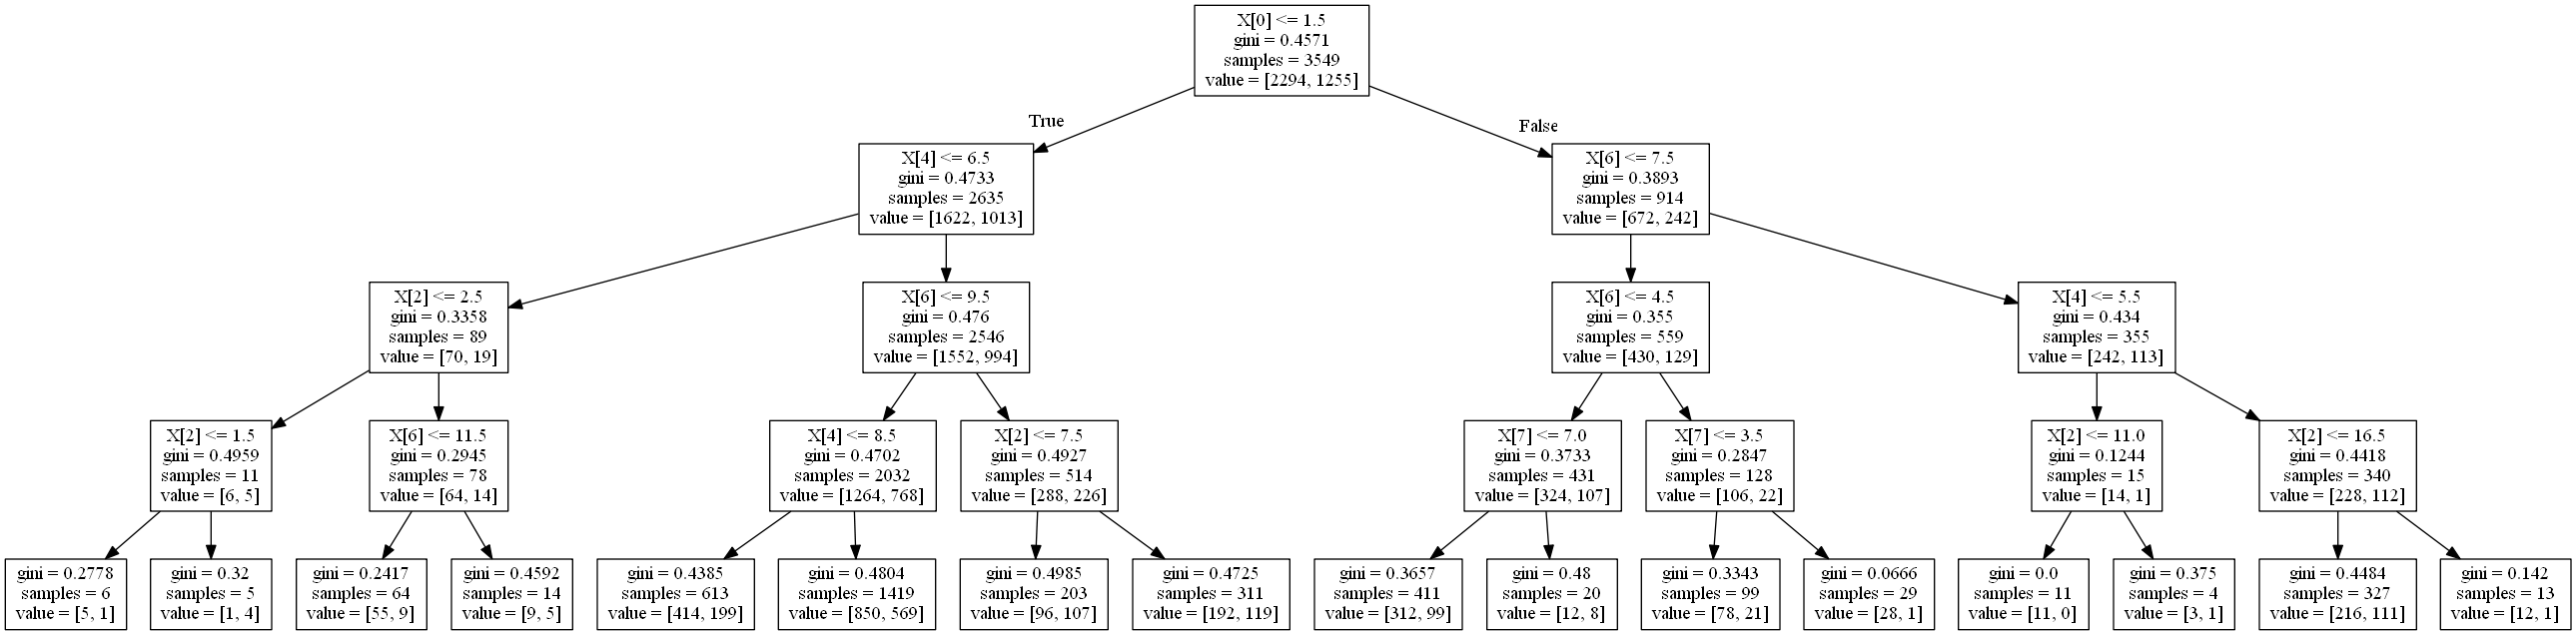

In [73]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

## Summary



We only get an accuracy score of 0.64 suggesting that the inputs chosen are not very good predictors of drug use. However the first input of White/Non-White has a 65% bias if true, then the next highest determinate is highest grade obtained from school and has a 61% bias if true. Followed by Job Type and has a 66% bias if true. In summary none of the inputs are very good predictors of drug use however children from homes were the parents have split seems to offer no predictability when compared to the other inputs.